# Introduction / Business problem

Paris is the capital of France. It is segmented in 20 neighborhoods called _"arrondissements"_.<br>
You may find a lot of information about Paris on <a href='https://en.wikipedia.org/wiki/Paris'>this page</a>.

The population of this city is very mixed, as is the case with most major cities in the world.<br>
You may find very wealthy households and very poor families. Ethnicity is also very diverse.

However, this does not mean that the distribution of the population is completely random. There are patterns when you look closer. For example, if you look at the 13th _arrondissement_, you will find that the proportion of chinese people is greater than in other _arrondissements_.

All in all, this diversity offers various opportunities for business plans because no matter what product or service you're selling, there is a very high chance that you will find someone who is interested, it's all about locating them.

Being able to target customers like this requires a lot of preparatory steps and once such step will be the topic of our project here :

**Can we find a correlation between the revenues of a household and the type of neighborhood the people live in?**

You may find this question absurd. Of course, when seeing a neighborhood, you can very often assume the level of wealth of its residents.<br>
The trick here is in the definition of _type of neighborhood_.

Instead of looking at the real estate for example, we will try to classify the neighborhoods depending on the venues available around but _without_ looking at the financial aspects of those venues.

This could give us some information about what wealthier people like to surround themselves with for example.

The problem here is that there are too few neighborhoods in Paris for the analysis to be statistically relevant, which is why we will adopt a more original method.

We will train a clustering algorithm not only on the neighborhoods inside of Paris, but we will also use Toronto and New York data.

We will then have a large training set and will be able to distinguish a few different types of neighborhoods without ever looking at the financial states.

Once this is done, we will have a look at the classification of the Paris neighborhoods and study their relation to the revenues data we have.

# Data

We will now discuss the data we chose to use for this project.

To be able to study the correlation between neighborhoods and revenues, we need data on the revenues. We will get it by scraping <a href='https://www.salairemoyen.com/departement-75-PARIS.html'>this website</a> which contains the relevant salary information for each neighborhood in Paris.

We will also use data gathered by the <a href='https://www.insee.fr/en/accueil'>INSEE</a> to get the latitude and longitude of each Paris neighborhood. You can download it <a href='https://data.opendatasoft.com/explore/dataset/code-postal-code-insee-2015%40public/table/'>here</a>.<br>
A more complex dataset will also be included for deeper research.

Toronto's neighborhood data (names and coordinates) will be scraped from <a href='https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1012118802'>this Wikipedia page</a>.

Finally, we will use a json file containing all the relevant information about the New York neighborhoods.

All those datasets contain (or, in the case of Paris, will allow to build) each neighborhood for those three cities and the respective latitudes and longitudes of those neighborhoods.

We will then be able to engineer a new feature, the `Center_distance` feature indicating how far each neighborhood is from downtown. This is a relevant factor when classifying neighborhoods.

With this data, we are planning to use the <a href='https://foursquare.com/'>FourSquare</a> API to get all the information we need about the venues in each neighborhood.<br>
The presence of certain types of venues will be the features that help us segment the neighborhoods in several categories (for now, 5 will be enough).

# Methodology

After acquiring all the necessary data, it is time to explore it.<br>
Let's start by investigating the average salary distribution for all of the Paris neighborhoods.

<img src="../analysis/displot_salaries.png" />

We now need to obtain the neighborhood data to start our analysis. As said earlier, it is difficult to confidently clusterize the neighborhoods in Paris given the huge amount of features and the very short amount of neighborhoods, only 20. This is why we will also use the Toronto and New York cities to help. We will also create a function to determine the distance between each neighborhood and the center of the city, given that this could be an important feature in determining the relationship between neighborhood and revenue.<br>
Here is a visualization of its distribution for each city.

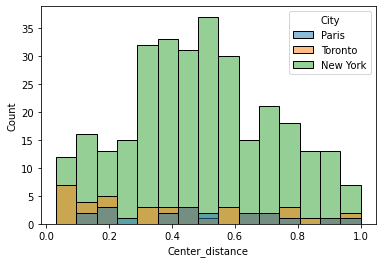

To get to the clustering part, we had to first get all the venues data about each neighborhood, using the FourSquare API.<br>
We then created a one hot dataframe for each city containing all the types of venues. To make sure they contain the same features and be able to concatenate them, we need to add to each dataframes the missing venues present in the other cities.<br>
Once this is done, we can use pandas' `pd.concat()` method to gather all the features, and include the center distance for each city.

Now on to the clustering.<br>
We will use `sklearn`'s `KMeans` to train our model on the three cities (the concatenated dataframe).

To make sure the clusters are not defined by the city the neighborhood is located, we have a look at their global distribution.

<img src='../analysis/cluster_distrib.png/'>

We can now focus on the Paris' neighborhoods.

<img src='../analysis/paris_clusters_map.png/' style='max-width:50%'>

And check the salary against the cluster association.

<img src='../analysis/cluster_salary_paris.png/'>

Finally, we conclude our study with a statistical test: ANOVA.
When working with categorical (cluster number) and continuous (average) variables, it can be challenging to study the correlations. The ANOVA test is a statistical test based on the null hypothesis H0: "The continuous variable has the same mean for each value of the categorical variable."

<img src='../analysis/anova.png/' style='max-width:40%'>

# Results

When studying the distribution of the salaries in Paris, we could expect it to be skewed or somewhat random, with gaps, given that there are only 20 samples. And the graph does seem a bit random but all in all, it sort of looks like a normal distribution.<br>

Now, when it comes to studying the center distances for each neighborhood, things are a bit different. In New York's case, the city with the largest amount of neighborhoods, the distribution seems very close to a gaussian distribution.<br>
However, in Paris and Toronto's cases, the distributions are much less standard, especially Toronto, which is somewhat surprising, given that this is the second city with the most neighborhoods, 4 times as much as Paris.

Nevertheless, we will continue studying the experiments.<br>
We first need to make sure the clusters seem to be equally spread among the cities, to ensure that there is no cluster that actually charaterizes one of them.<br>
The graph seems to show that this is not the case. The cluster distributions among the three cities seem alike, or at least the scale is visually the same for each cluster.

But when looking at the map, it seems that there is a very strong correlation between the neighborhood clustering mechanism and the distance between the city center and the neighborhood.

The plot describing the salaries according to the neighborhood cluster seems to show that there is no obvious correlation, although some neighborhood clusters seem to struggle to elevate the salaries.

This is confirmed by the statistical test: the _p value_ is 0.07452, which is about 7%, higher than the 5% standard threshold for such tests. This means that we cannot claim that the salary average will vary depending on the cluster.

# Discussion

The first thing we need to take into account is the very low amount of data. Even with the whole training dataset, we don't even reach 400 neighborhoods.<br>
Considering we're using this data to be able to study only Paris' 20 neighborhoods, this matters a lot.<br>
This not only means that this could be improved using other cities, but also that if we had more than 20 neighborhoods in Paris, we might be able to observe different results.

With the goal of studying Paris' neighborhoods, we'll discuss the various improvements and possible interpretations of the results of this project. If we were to choose to study whether the type of neighborhood is correlated to the average salary, we would choose another dataset, containing salaries for much more neighborhoods.

It would be very interesting to study how Toronto's neighborhoods' geographical locations affects the whole study. Indeed, if you look at the distance graph, it seems that neighborhoods tend to be very close to the center of the city rather than on the outskirts.

Perhaps the most intriguing result is that of the clustering. It would seem that there is a very strong correlation between the assigned cluster and the center proximity. It is possible that the clustering is based solely on that factor because of how sparse the data is. It is also possible that the neighborhoods' venues distribution is already related to the center distance. One way to figure it out, which will eventually be added to this study, would be to try the clustering again but without the `Center_distance` feature. Or even better, to find a way to reduce its influence on the model. The reason it was added in the first place was that neighborhoods tend to attract wealthier people the closer they are to the most lively part of the city.

We also need to keep in mind that the results of the test are not that clear cut. Our p value was below 8%, which is really not that much.

# Conclusion

It was a challenging project from the beginning, considering the fact that Paris has very few neighborhoods (only 20). This makes the analysis inherently difficult but can still provide some guidance.

To gain more insight, we could try the same experiment in a city with a larger amount of neighborhoods.

Another point to try would be to compare the different clusterings with and without the `Center_distance` feature, which seems very natural to include but seems to strongly affect the model.

As of yet, it seems we cannot expose a clear correlation between neighborhood types (in terms of venues) and average salary, at least in Paris.